In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv("train.csv")
df.head()

name  \
0       Guest Quarters on Capitol Hill   
1  Private oasis. Top floor w/ 2 decks   
2    People's Place -Convention Center   
3                           M St Apt C   
4   Columbia Heights Rm w/Private Bath   

                                             summary  \
0  The  Guest Quarters on Capitol Hill is a garde...   
1  Top two floors, two bathrooms and two decks. M...   
2                                                NaN   
3  Inspired by MidEast styles. 1 full bed, 1 air ...   
4  Enjoy our dressed up guest room in the heart o...   

                                         description  \
0  The  Guest Quarters on Capitol Hill is a garde...   
1  Top two floors, two bathrooms and two decks. M...   
2  This 2 bedroom apartment is on the ground floo...   
3  Inspired by MidEast styles. 1 full bed, 1 air ...   
4  Enjoy our dressed up guest room in the heart o...   

                               neighborhood_overview  \
0  the convenience and charm of being on Capitol ...   
1  Adams Morgan is the most vibrant part of DC wh...   
2                                                NaN   
3  I love this neighborhood! Mt. Vernon is the ve...   
4                                                NaN   

                                             transit  host_since  \
0  The Red Line and the Blue Line Metros are with...  2013-08-14   
1  There is so many transportation options. Acros...  2012-01-23   
2                                                NaN  2009-10-31   
3  The Mt. Vernon Sq metro is just 2 blocks away ...  2013-04-23   
4                                                NaN  2012-07-09   

                                     host_location  \
0  Washington, District of Columbia, United States   
1  Washington, District of Columbia, United States   
2              Berkeley, California, United States   
3         San Francisco, California, United States   
4  Washington, District of Columbia, United States   

                                          host_about host_response_rate  \
0  We are a reservation service for many DC area ...                98%   
1  I have lived in DC for that past five years, b...               100%   
2  A professional photo editor and photographer l...                97%   
3  I am from Oakland, California and I like to li...                92%   
4  I'm a tree-hugger at heart. My wife is an arti...               100%   

  host_acceptance_rate  ... review_scores_accuracy review_scores_cleanliness  \
0                  52%  ...                   10.0                      10.0   
1                 100%  ...                    9.0                       9.0   
2                 100%  ...                    8.0                       8.0   
3                 100%  ...                    9.0                       8.0   
4                  75%  ...                    9.0                       9.0   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  10.0                        10.0                   10.0   
1                  10.0                         9.0                   10.0   
2                   9.0                         9.0                    9.0   
3                   8.0                         8.0                    9.0   
4                  10.0                        10.0                    8.0   

  review_scores_value instant_bookable cancellation_policy  \
0                 8.0                f              strict   
1                 9.0                f              strict   
2                 9.0                f              strict   
3                 9.0                f            flexible   
4                 9.0                f            moderate   

  calculated_host_listings_count reviews_per_month  
0                             41              0.18  
1                              1              0.41  
2                              3              1.09  
3                              4              4.34

In [39]:
df.columns

Index(['name', 'summary', 'description', 'neighborhood_overview', 'transit',
       'host_since', 'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'host_verifications',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [40]:
df.describe()

accommodates    bathrooms     bedrooms         beds  guests_included  \
count   3013.000000  2988.000000  3000.000000  3003.000000       3013.00000   
mean       3.201792     1.253179     1.211333     1.653347          1.62164   
std        2.030912     0.589559     0.843154     1.203223          1.35016   
min        1.000000     0.000000     0.000000     1.000000          0.00000   
25%        2.000000     1.000000     1.000000     1.000000          1.00000   
50%        2.000000     1.000000     1.000000     1.000000          1.00000   
75%        4.000000     1.000000     1.000000     2.000000          2.00000   
max       16.000000     8.000000    10.000000    16.000000         16.00000   

       minimum_nights  maximum_nights  number_of_reviews  \
count     3013.000000    3.013000e+03        3013.000000   
mean         2.257883    7.168688e+05          15.304016   
std          3.912753    3.912318e+07          30.152179   
min          1.000000    1.000000e+00           0.000000   
25%          1.000000    1.200000e+02           1.000000   
50%          2.000000    1.125000e+03           4.000000   
75%          3.000000    1.125000e+03          16.000000   
max        180.000000    2.147484e+09         362.000000   

       review_scores_rating  review_scores_accuracy  \
count           2310.000000             2307.000000   
mean              93.429870                9.546597   
std                7.854517                0.780770   
min               30.000000                2.000000   
25%               90.000000                9.000000   
50%               95.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2306.000000            2306.000000   
mean                    9.322203               9.715958   
std                     1.071339               0.677802   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2309.000000             2309.000000   
mean                      9.751408                9.388047   
std                       0.615128                0.903563   
min                       3.000000                4.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  calculated_host_listings_count  reviews_per_month  
count          2309.000000                     3013.000000        2341.000000  
mean              9.328714                        3.204779           1.804216  
std               0.844881                        6.188674           1.754306  
min               2.000000                        1.000000           0.010000  
25%               9.000000                        1.000000           0.560000  
50%               9.000000                        1.000000           1.120000  
75%              10.000000                        2.000000           2.530000  
max              10.000000                       41.000000          10.430000

In [9]:
df = df.drop(columns = ['name', 'summary', 'description','neighborhood_overview', 'transit',
                   'host_since', 'host_location', 'host_about', 'neighbourhood_cleansed', 
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'zipcode', 'amenities', 
                       'host_verifications', 'host_neighbourhood'])

In [42]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(24)

Total   Percent
cleaning_fee                     1127  0.374046
review_scores_checkin             707  0.234650
review_scores_cleanliness         707  0.234650
review_scores_accuracy            706  0.234318
review_scores_value               704  0.233654
review_scores_location            704  0.233654
review_scores_communication       704  0.233654
review_scores_rating              703  0.233322
reviews_per_month                 672  0.223034
host_acceptance_rate              493  0.163624
host_response_rate                349  0.115831
bathrooms                          25  0.008297
bedrooms                           13  0.004315
beds                               10  0.003319
property_type                       1  0.000332
number_of_reviews                   0  0.000000
maximum_nights                      0  0.000000
calculated_host_listings_count      0  0.000000
guests_included                     0  0.000000
instant_bookable                    0  0.000000
price                               0  0.000000
bed_type                            0  0.000000
accommodates                        0  0.000000
room_type                           0  0.000000

In [43]:
df.dtypes

host_response_rate                 object
host_acceptance_rate               object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
price                              object
cleaning_fee                       object
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
instant_bookable                   object
cancellation_policy               

In [46]:
df.nunique().sort_values(ascending=False)

reviews_per_month                 556
price                             268
number_of_reviews                 156
maximum_nights                     90
cleaning_fee                       81
host_acceptance_rate               68
host_response_rate                 59
review_scores_rating               39
calculated_host_listings_count     18
minimum_nights                     17
accommodates                       16
guests_included                    14
beds                               13
bathrooms                          13
property_type                      11
bedrooms                            9
review_scores_cleanliness           9
review_scores_checkin               8
review_scores_value                 8
review_scores_communication         8
review_scores_location              7
review_scores_accuracy              7
bed_type                            5
cancellation_policy                 4
room_type                           3
instant_bookable                    2
dtype: int64

In [10]:
df.price = df.price.replace({'\$':''}, regex = True)
df.price = df.price.replace({',':''}, regex = True)
df.price = [float(x) for x in df.price]
df.cleaning_fee = df.cleaning_fee.replace({'\$':''}, regex = True)
df.cleaning_fee = df.cleaning_fee.replace({',':''}, regex = True)
df.cleaning_fee = [float(x) for x in df.cleaning_fee]

In [11]:
df.host_response_rate = df.host_response_rate.replace({'\%':''}, regex = True)
df.host_response_rate = df.host_response_rate.replace({',':''}, regex = True)
df.host_response_rate = [float(x) for x in df.host_response_rate]
df.host_acceptance_rate = df.host_acceptance_rate.replace({'\%':''}, regex = True)
df.host_acceptance_rate = df.host_acceptance_rate.replace({',':''}, regex = True)
df.host_acceptance_rate = [float(x) for x in df.host_acceptance_rate]

In [12]:
df.describe()

accommodates    bathrooms     bedrooms         beds        price  \
count   3013.000000  2988.000000  3000.000000  3003.000000  3013.000000   
mean       3.201792     1.253179     1.211333     1.653347   150.573183   
std        2.030912     0.589559     0.843154     1.203223   147.364464   
min        1.000000     0.000000     0.000000     1.000000    10.000000   
25%        2.000000     1.000000     1.000000     1.000000    85.000000   
50%        2.000000     1.000000     1.000000     1.000000   115.000000   
75%        4.000000     1.000000     1.000000     2.000000   165.000000   
max       16.000000     8.000000    10.000000    16.000000  2822.000000   

       cleaning_fee  guests_included  minimum_nights  maximum_nights  \
count   1886.000000       3013.00000     3013.000000    3.013000e+03   
mean      59.460764          1.62164        2.257883    7.168688e+05   
std       44.683494          1.35016        3.912753    3.912318e+07   
min        5.000000          0.00000        1.000000    1.000000e+00   
25%       25.000000          1.00000        1.000000    1.200000e+02   
50%       50.000000          1.00000        2.000000    1.125000e+03   
75%       75.000000          2.00000        3.000000    1.125000e+03   
max      300.000000         16.00000      180.000000    2.147484e+09   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
count        3013.000000           2310.000000             2307.000000   
mean           15.304016             93.429870                9.546597   
std            30.152179              7.854517                0.780770   
min             0.000000             30.000000                2.000000   
25%             1.000000             90.000000                9.000000   
50%             4.000000             95.000000               10.000000   
75%            16.000000            100.000000               10.000000   
max           362.000000            100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2306.000000            2306.000000   
mean                    9.322203               9.715958   
std                     1.071339               0.677802   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2309.000000             2309.000000   
mean                      9.751408                9.388047   
std                       0.615128                0.903563   
min                       3.000000                4.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  calculated_host_listings_count  reviews_per_month  
count          2309.000000                     3013.000000        2341.000000  
mean              9.328714                        3.204779           1.804216  
std               0.844881                        6.188674           1.754306  
min               2.000000                        1.000000           0.010000  
25%               9.000000                        1.000000           0.560000  
50%               9.000000                        1.000000           1.120000  
75%              10.000000                        2.000000           2.530000  
max              10.000000                       41.000000          10.430000

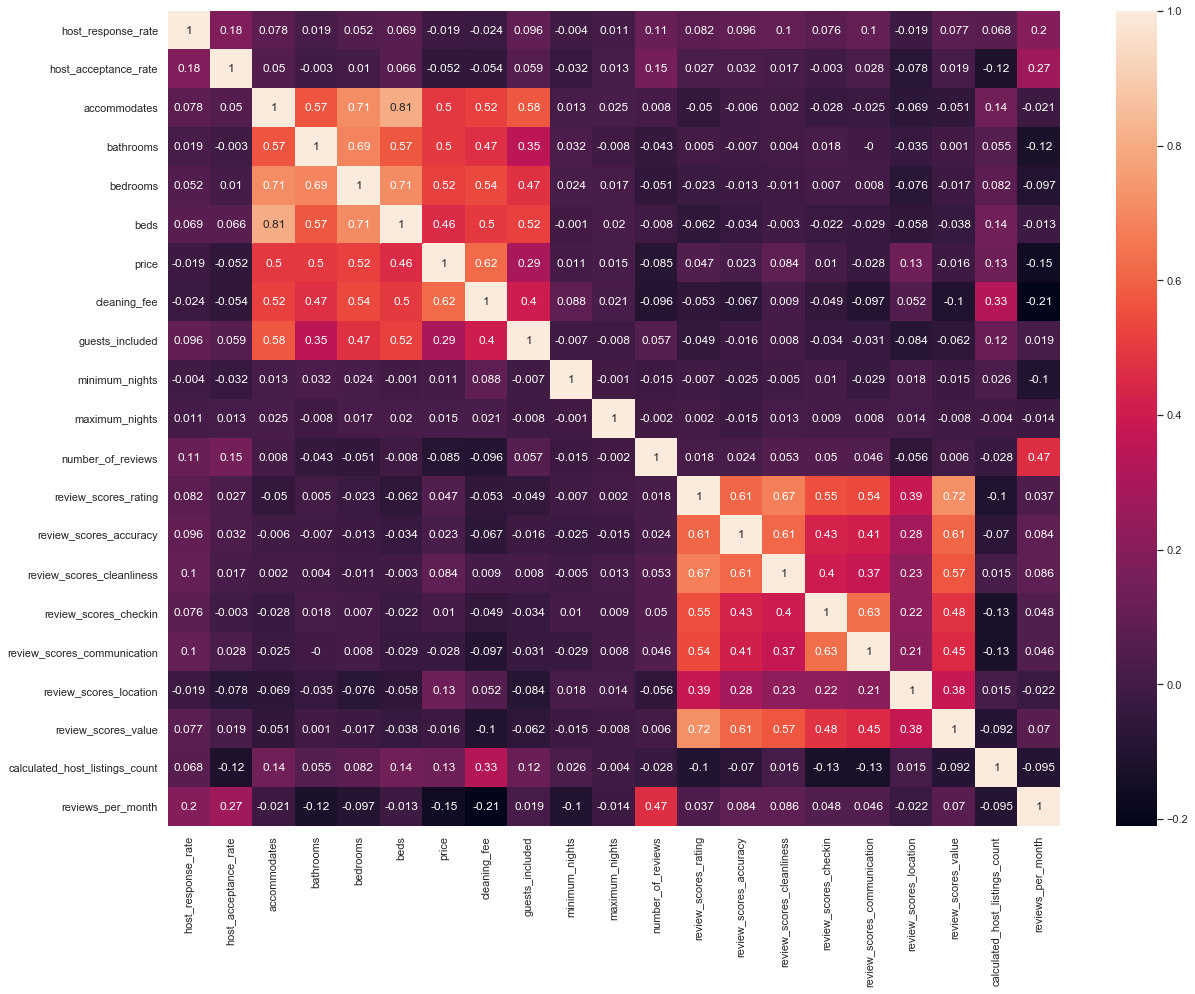

In [15]:
corrmat = df.corr().round(3)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [6]:
sns.set()
cols = set(df._get_numeric_data().columns)
sns.pairplot(df[cols], size = 3.5)
plt.show();

H:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002D6E0AC9D38> (for post_execute):


KeyboardInterrupt: 

In [89]:
def remove_outlier(df):
    for col_names in list(df._get_numeric_data().columns):
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() if y > df[col_names].mean()+3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = np.exp(df[col_names])
    return df

df = remove_outlier(df)

H:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


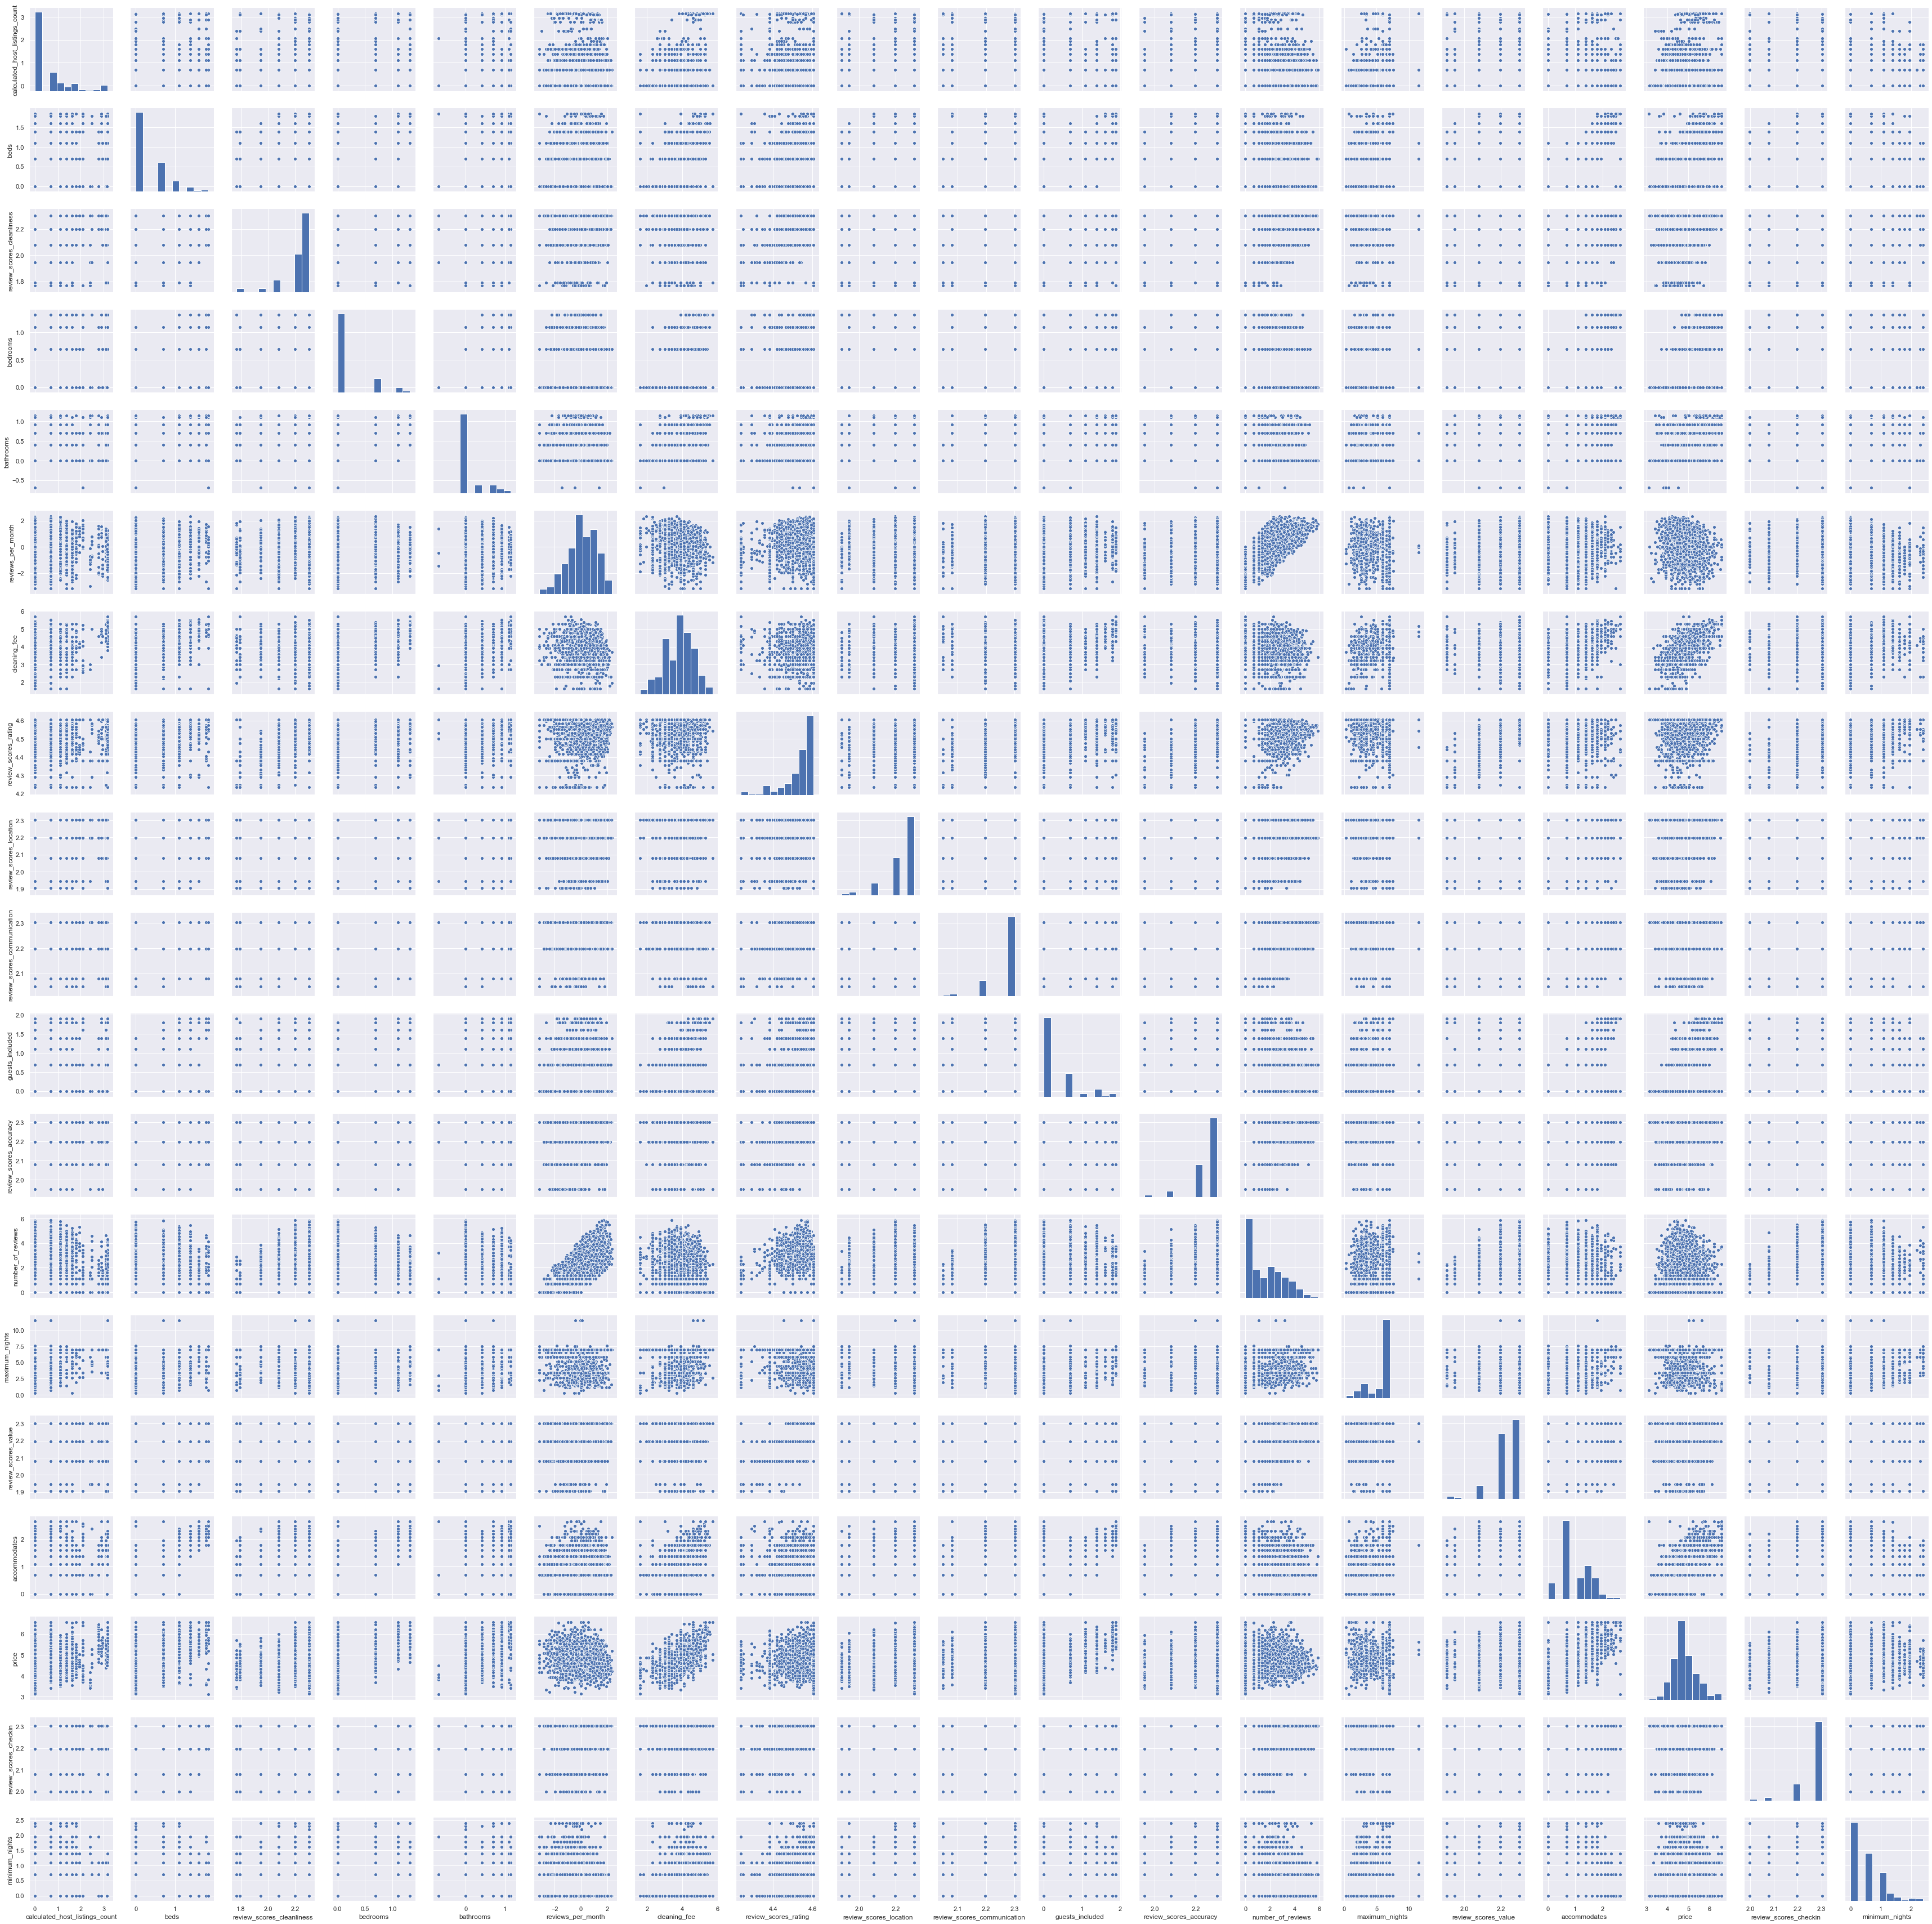

In [23]:
sns.set()
cols = set(df._get_numeric_data().columns)
df_num = df[cols].copy()
sns.pairplot(np.log(df_num), size = 2.5)
plt.show();

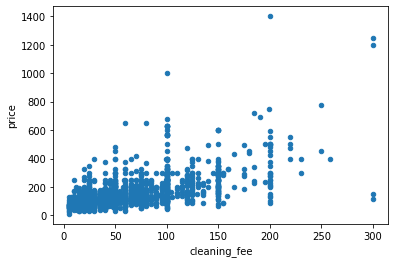

In [48]:
var = 'cleaning_fee'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price');

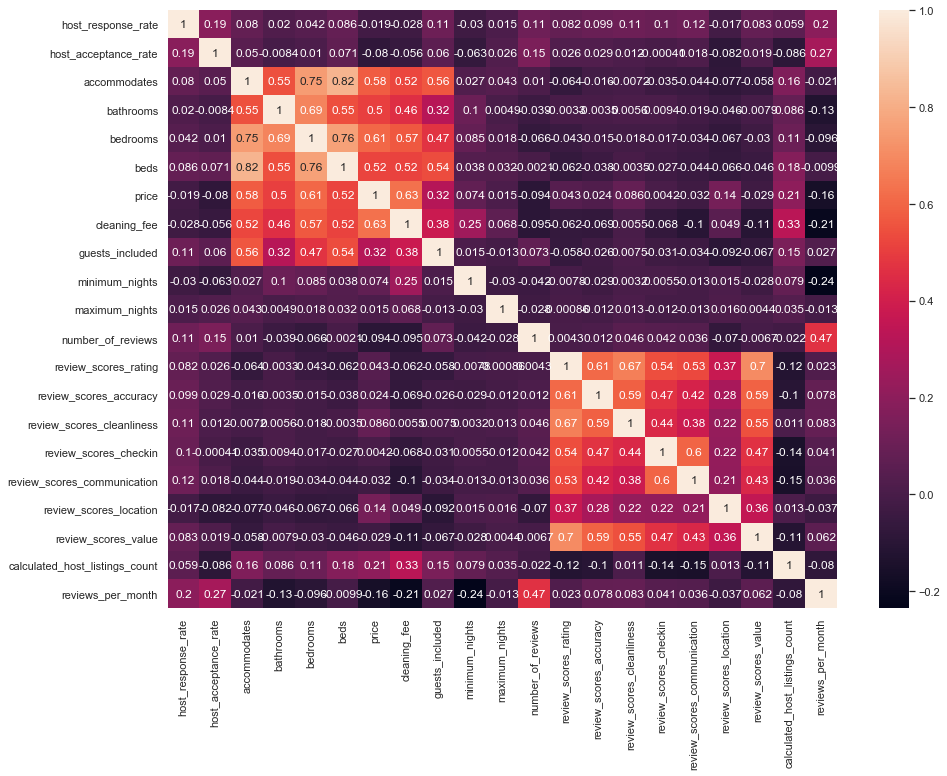

In [90]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(corrmat, annot=True)
plt.show()

In [110]:
def encoding_char(df):
    char_var = list(set(df.columns) - set(df._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(df[col_names])
        df[col_names] = pd.factorize(df[col_names])[0]
    return(df)

#df = encoding_char(df)

def imputer_knn(df):
    num_cols = list(df._get_numeric_data().columns)
    df_1 = df.copy()
    df_1 = encoding_char(df_1).round()
    imputer = KNNImputer(n_neighbors=30, weights="uniform")
    df_1 = imputer.fit_transform(df_1)
    df_1 = pd.DataFrame(df_1, columns = df.columns)
    return(df_1)

df_1 = imputer_knn(df)

In [115]:
total = df_1.isnull().sum().sort_values(ascending=False)
percent = (df_1.isnull().sum()/df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(24)

Total  Percent
reviews_per_month                   0      0.0
calculated_host_listings_count      0      0.0
host_acceptance_rate                0      0.0
property_type                       0      0.0
room_type                           0      0.0
accommodates                        0      0.0
bathrooms                           0      0.0
bedrooms                            0      0.0
beds                                0      0.0
bed_type                            0      0.0
price                               0      0.0
cleaning_fee                        0      0.0
guests_included                     0      0.0
minimum_nights                      0      0.0
maximum_nights                      0      0.0
number_of_reviews                   0      0.0
review_scores_rating                0      0.0
review_scores_accuracy              0      0.0
review_scores_cleanliness           0      0.0
review_scores_checkin               0      0.0
review_scores_communication         0      0.0
review_scores_location              0      0.0
review_scores_value                 0      0.0
instant_bookable                    0      0.0

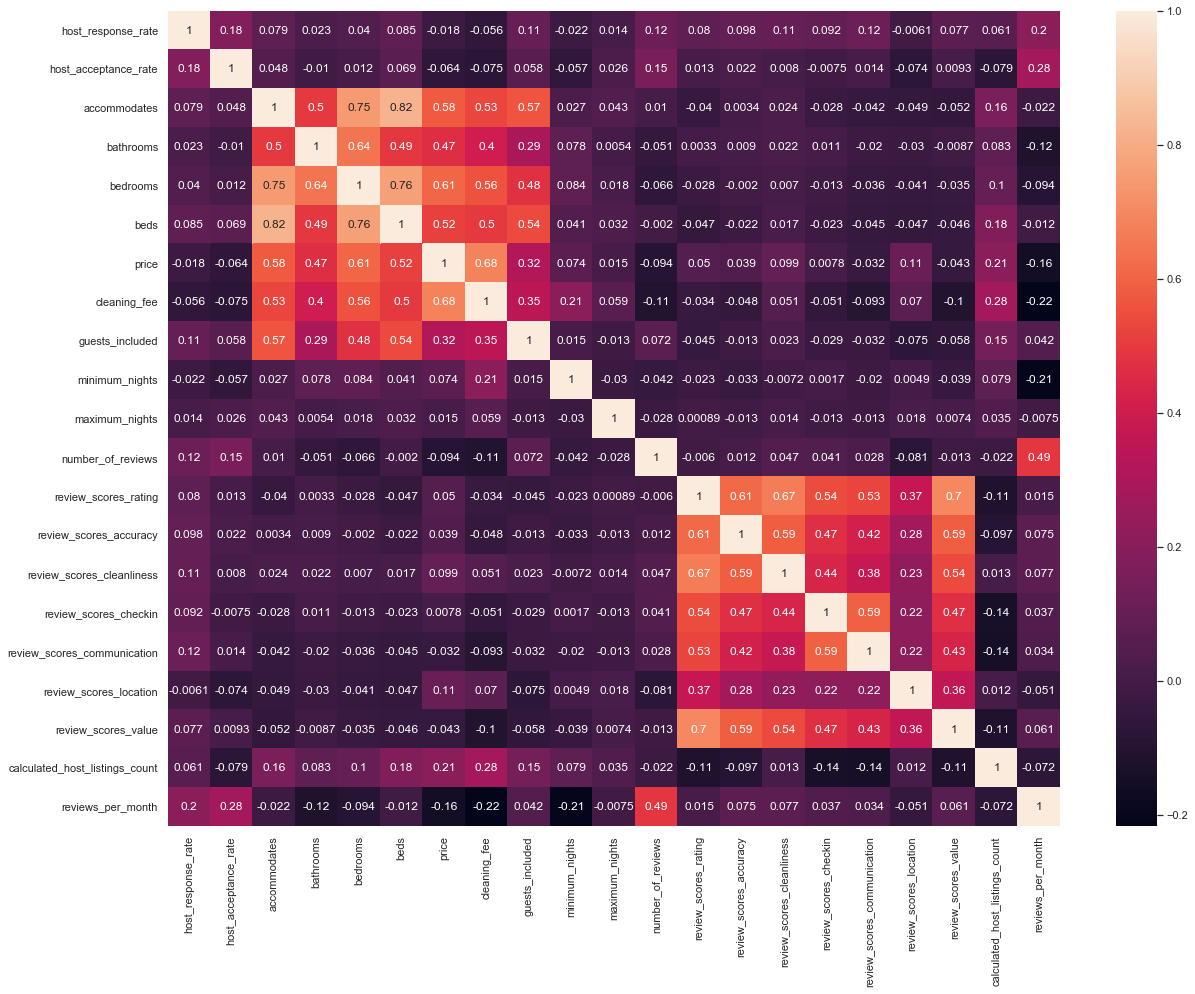

In [111]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

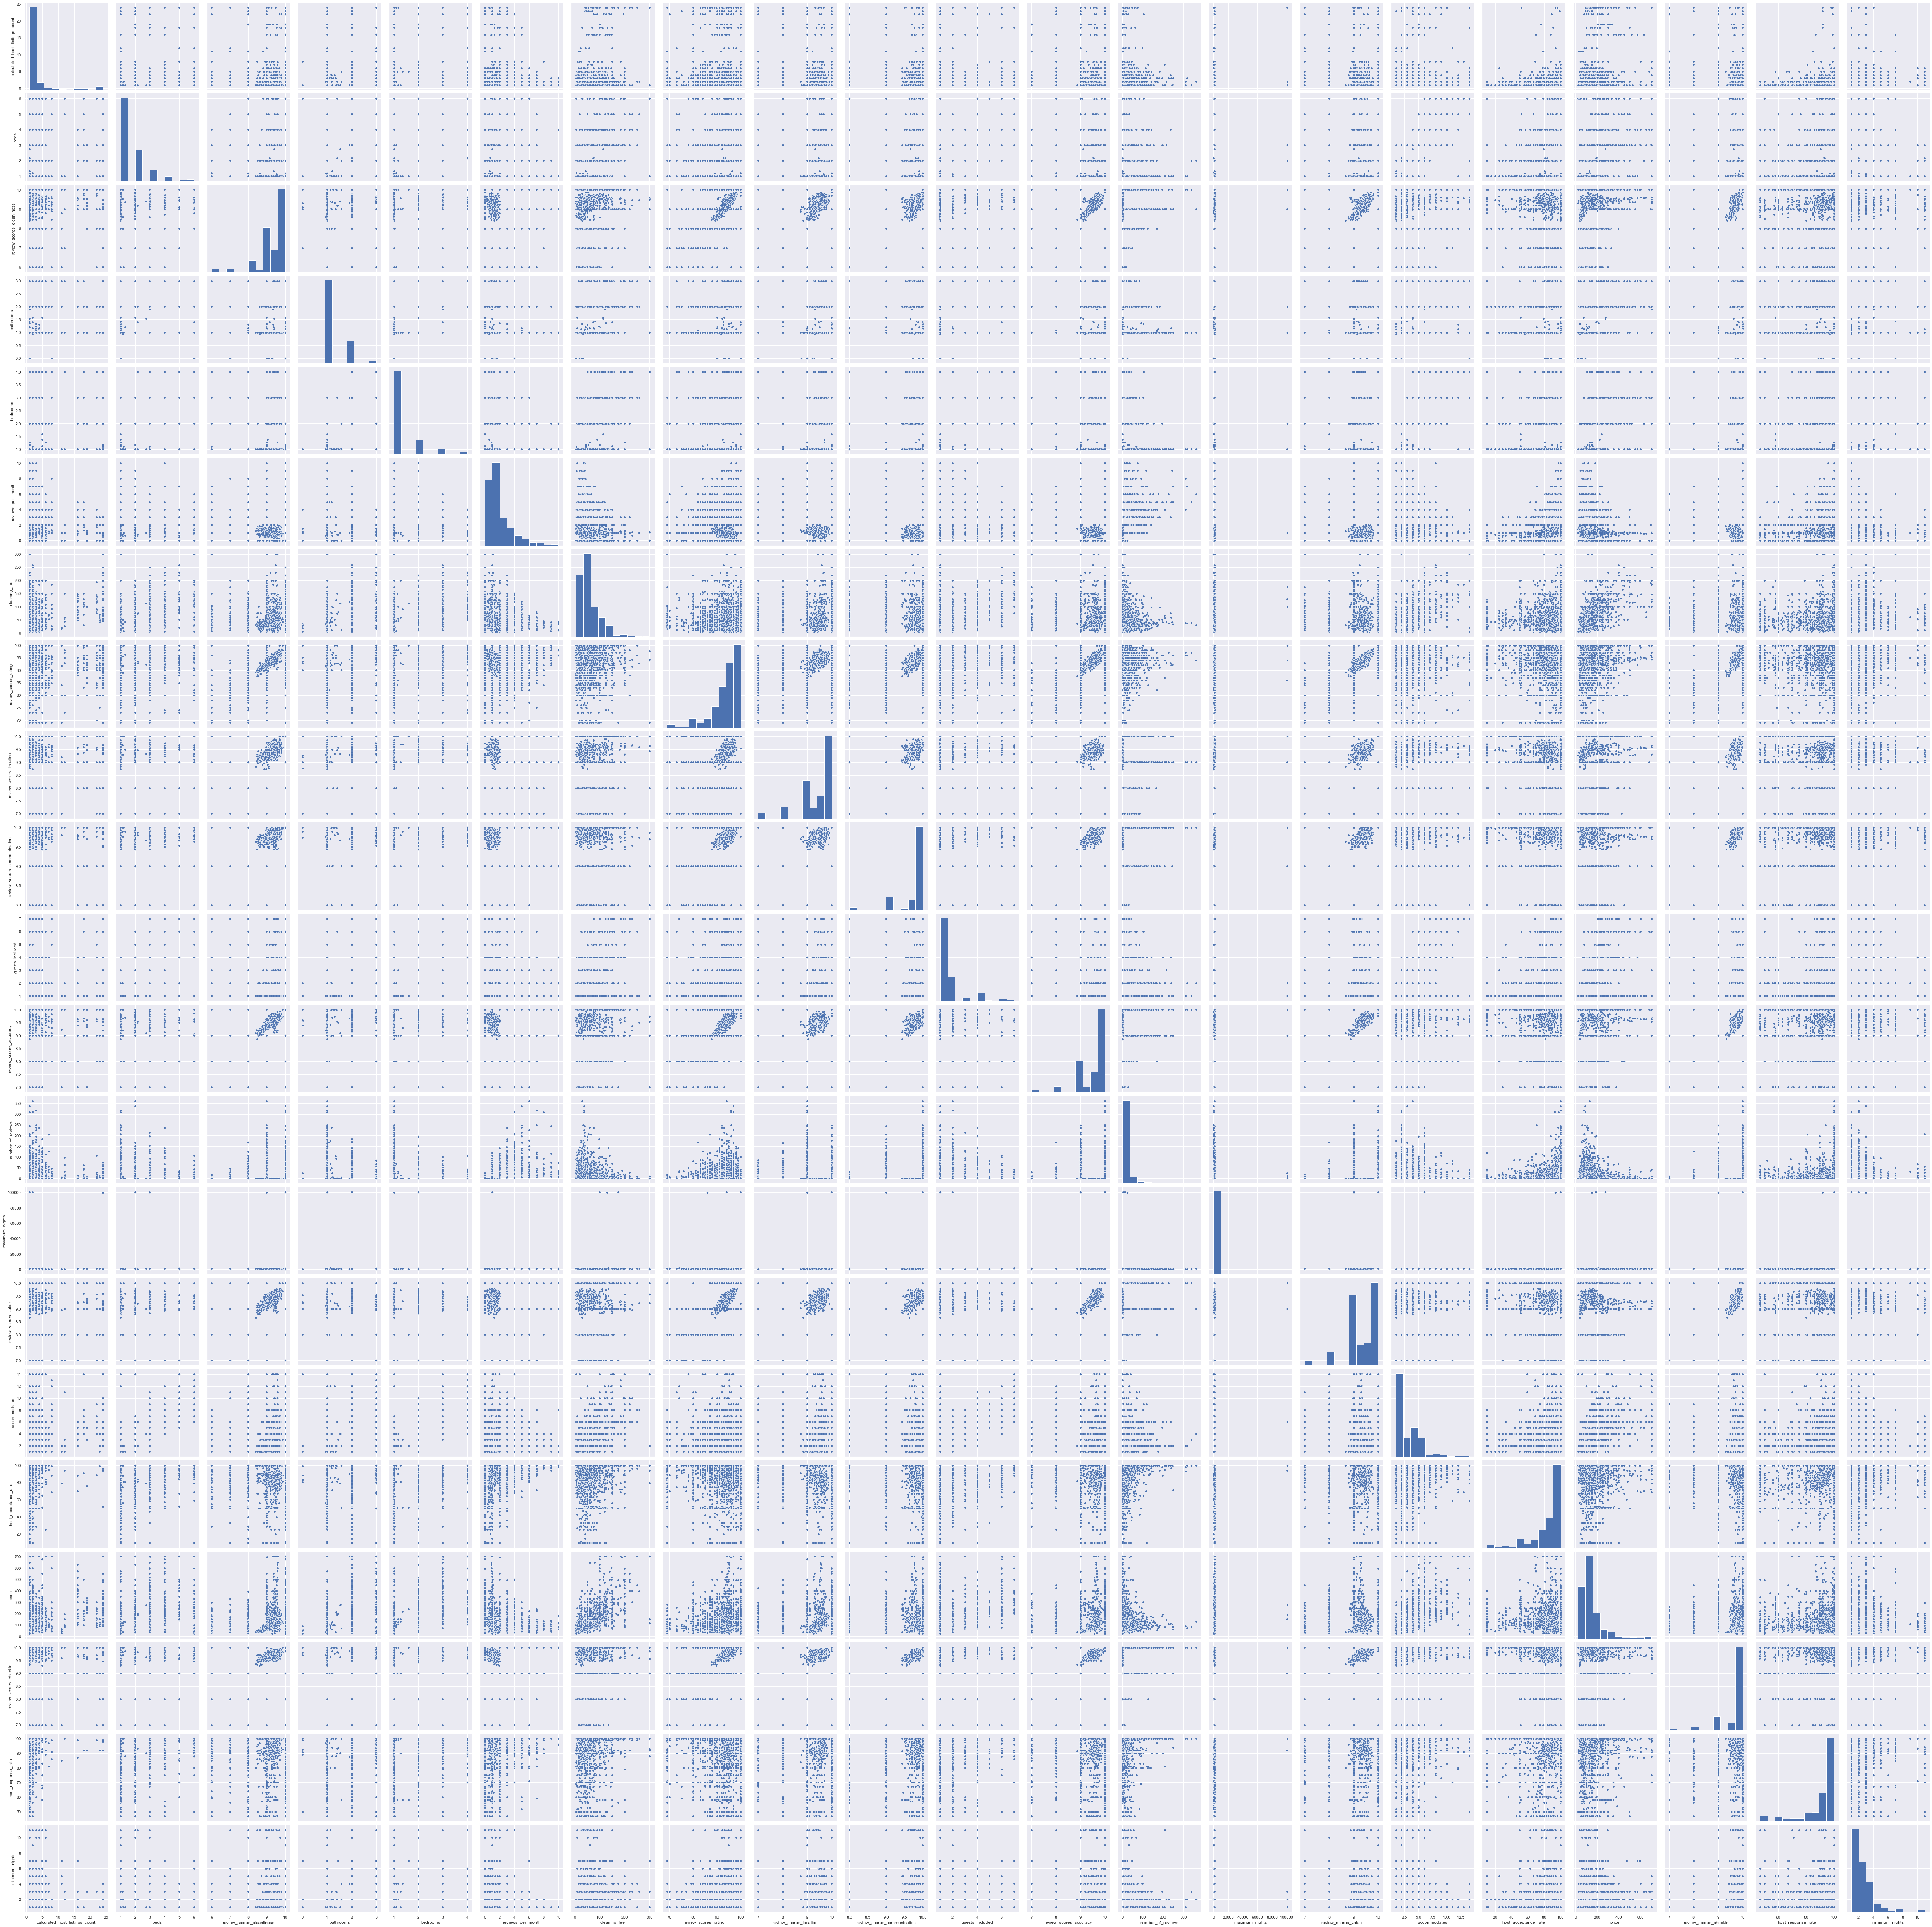

In [114]:
sns.set()
cols = set(df._get_numeric_data().columns)
sns.pairplot(df_1[cols], height = 3.5)
plt.show();

In [116]:
df.to_csv('df.csv', index=False)
df_1.to_csv('df_1.csv', index=False)